In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/mac/Desktop/CSV.FILE/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check the Duplicated Rows
df.duplicated().sum()

0

In [7]:
# Check how many customers leave the bank
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
# Remove the Unwanted Columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Tranform Here we can also use One Hot Encoding but i am here using pandas frame

In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int) # default is boolean so here we change the data type 

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### In Neural Network during the model training 'scale' the value because some value very big and some value are very small

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(columns=['Exited'])
Y = df['Exited']

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [21]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


### Scaling 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [27]:
import tensorflow

2025-04-08 20:40:08.878924: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


### Model Building through Keras 
#### In Keras there are two types of model building 
#### 1.Sequential model building 
#### 2. Non-Sequential building

In [30]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11)) # This is input layer and 
model.add(Dense(11,activation='relu',input_dim=11)) #also this is layer and we can change the number of layers here i build 2 layers

model.add(Dense(1,activation='sigmoid')) # This is output layer


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model.summary()

In [32]:
## Model Compilation
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [33]:
## Fit the model
history = model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2) # We can change the epochs value according to loss 

# Validation_split means it take 20% for the testing

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7347 - val_loss: 0.4796
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4601 - val_loss: 0.4357
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4235 - val_loss: 0.4210
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4053 - val_loss: 0.4088
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4082 - val_loss: 0.3978
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3903 - val_loss: 0.3850
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3746 - val_loss: 0.3750
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3625 - val_loss: 0.3649
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3570 - val_loss: 0.3618
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3758 - val_loss: 0.3578
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3522 - val_loss: 0.3551
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

# Find the weights of 1st layer and in  [the array there is showing the bayes]
model.layers[0].get_weights()

In [35]:
model.layers[1].get_weights()

[array([[ 0.48914158, -0.6753036 ,  0.5388737 , -0.15389936,  0.2651061 ,
          0.479086  , -0.24206647,  0.14077485,  0.18240942, -0.25656995,
          0.40456143],
        [ 0.3931775 , -0.7121905 ,  0.43675837,  0.64488643, -0.01965905,
         -0.05856236,  0.41825387,  0.02819504, -0.01115912, -0.23193748,
         -0.14552139],
        [-0.34590584,  0.65252835,  0.08081091,  0.15138084,  0.33484167,
         -0.07047123,  0.22861484,  0.30048662,  0.25859228,  0.31079307,
         -0.21583197],
        [ 0.15624245,  0.5737825 ,  0.53077024, -0.35208452, -0.47544512,
         -0.03098015,  0.13782918, -0.5767241 ,  0.69019437,  0.6166878 ,
         -0.2632756 ],
        [-0.19499482,  0.36548254, -0.6373686 ,  0.22345458,  0.394706  ,
          0.5608814 , -0.4154559 ,  0.6459848 , -0.6770702 , -0.00286768,
          0.5720125 ],
        [ 0.39864326, -0.49669915,  0.3982051 , -0.69626987,  0.5547959 ,
         -0.262421  , -1.0975149 ,  0.9265399 ,  0.4562327 , -0.0562981

In [36]:
# Prediction 
model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.06028885],
       [0.09243724],
       [0.08921318],
       ...,
       [0.00706086],
       [0.03081105],
       [0.27675045]], dtype=float32)

### Here we can see the output is not 0,1 because we are using Sigmoid function and we know that when we use Sigmoid function the output range is between 0 to 1.

## Here i am going to convert into 0,1 

In [39]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [40]:
y_pred = np.where(y_log>0.5,1,0)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.868

## Tips :-
### We can improve the output and increase the accuracy score with the help of some changes in Neural Network
#### 1. We can increase the number of epochs
#### 2. We can use different type of activation function like :- 'sigmoid', 'relu', 'tanh'.
#### 3. In  the hidden layer we can increase the number of nodes(Dense).
#### 4. We can increase the number of hidden layers 

## We have to plot 2 basic Graph for checking how our models is work

In [45]:
import matplotlib.pyplot as plt

In [46]:
history

In [47]:
history.history

{'loss': [0.6076967716217041,
  0.44790786504745483,
  0.42230522632598877,
  0.4095745384693146,
  0.39801445603370667,
  0.38668328523635864,
  0.37546610832214355,
  0.3656458258628845,
  0.3587874174118042,
  0.35383984446525574,
  0.3505980372428894,
  0.34759625792503357,
  0.345823734998703,
  0.3450639247894287,
  0.3435392677783966,
  0.34281694889068604,
  0.34156009554862976,
  0.34042441844940186,
  0.33994659781455994,
  0.3397976756095886,
  0.33872050046920776,
  0.33806121349334717,
  0.3378697633743286,
  0.3373226821422577,
  0.33643394708633423,
  0.3362693786621094,
  0.3353632986545563,
  0.33549296855926514,
  0.3355028033256531,
  0.3344567120075226,
  0.3345656096935272,
  0.33379703760147095,
  0.3334506154060364,
  0.3331821858882904,
  0.332777738571167,
  0.3325050473213196,
  0.3323744535446167,
  0.3319738805294037,
  0.3318471908569336,
  0.33116886019706726,
  0.331495463848114,
  0.3308987319469452,
  0.3306695818901062,
  0.3302660286426544,
  0.330052

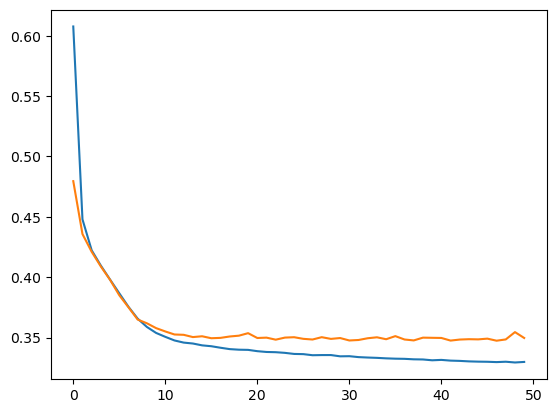

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
